In [1]:
# imports 
import numpy as np 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os 
import shutil
import random 
from random import sample 
import glob
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

2022-08-31 12:12:01.774537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-31 12:12:01.774562: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_data_location = r"/home/d/code/python/crack_detection/models/dogs-vs-cats/train/"

In [3]:
# orgnize data into directories 
os.chdir('models/dogs-vs-cats/train/')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
for c in sample(glob.glob('cat*'), 500):
    shutil.move(c, 'train/cat')
for c in sample(glob.glob('dog*'), 500):
    shutil.move(c, 'train/dog')
    
for c in sample(glob.glob('dog*'), 100):
    shutil.move(c, 'valid/dog')
for c in sample(glob.glob('cat*'), 100):
    shutil.move(c, 'valid/cat')

for c in sample(glob.glob('dog*'), 50):
    shutil.move(c, 'test/dog')
for c in sample(glob.glob('cat*'), 50):
    shutil.move(c, 'test/cat')
os.chdir('../../..')


In [4]:
train_path = '/home/d/code/python/crack_detection/models/dogs-vs-cats/train/train'
valid_path = '/home/d/code/python/crack_detection/models/dogs-vs-cats/train/valid/'
test_path = '/home/d/code/python/crack_detection/models/dogs-vs-cats/train/test/'

In [5]:
#                                  |  applies some preprocessint images-------------------------------|                    
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=5)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=5)
# shuffle is false on test batch, it so it's consistent with preprocessing  
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=5, shuffle=False)

Found 9000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
imgs, labels = next(train_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


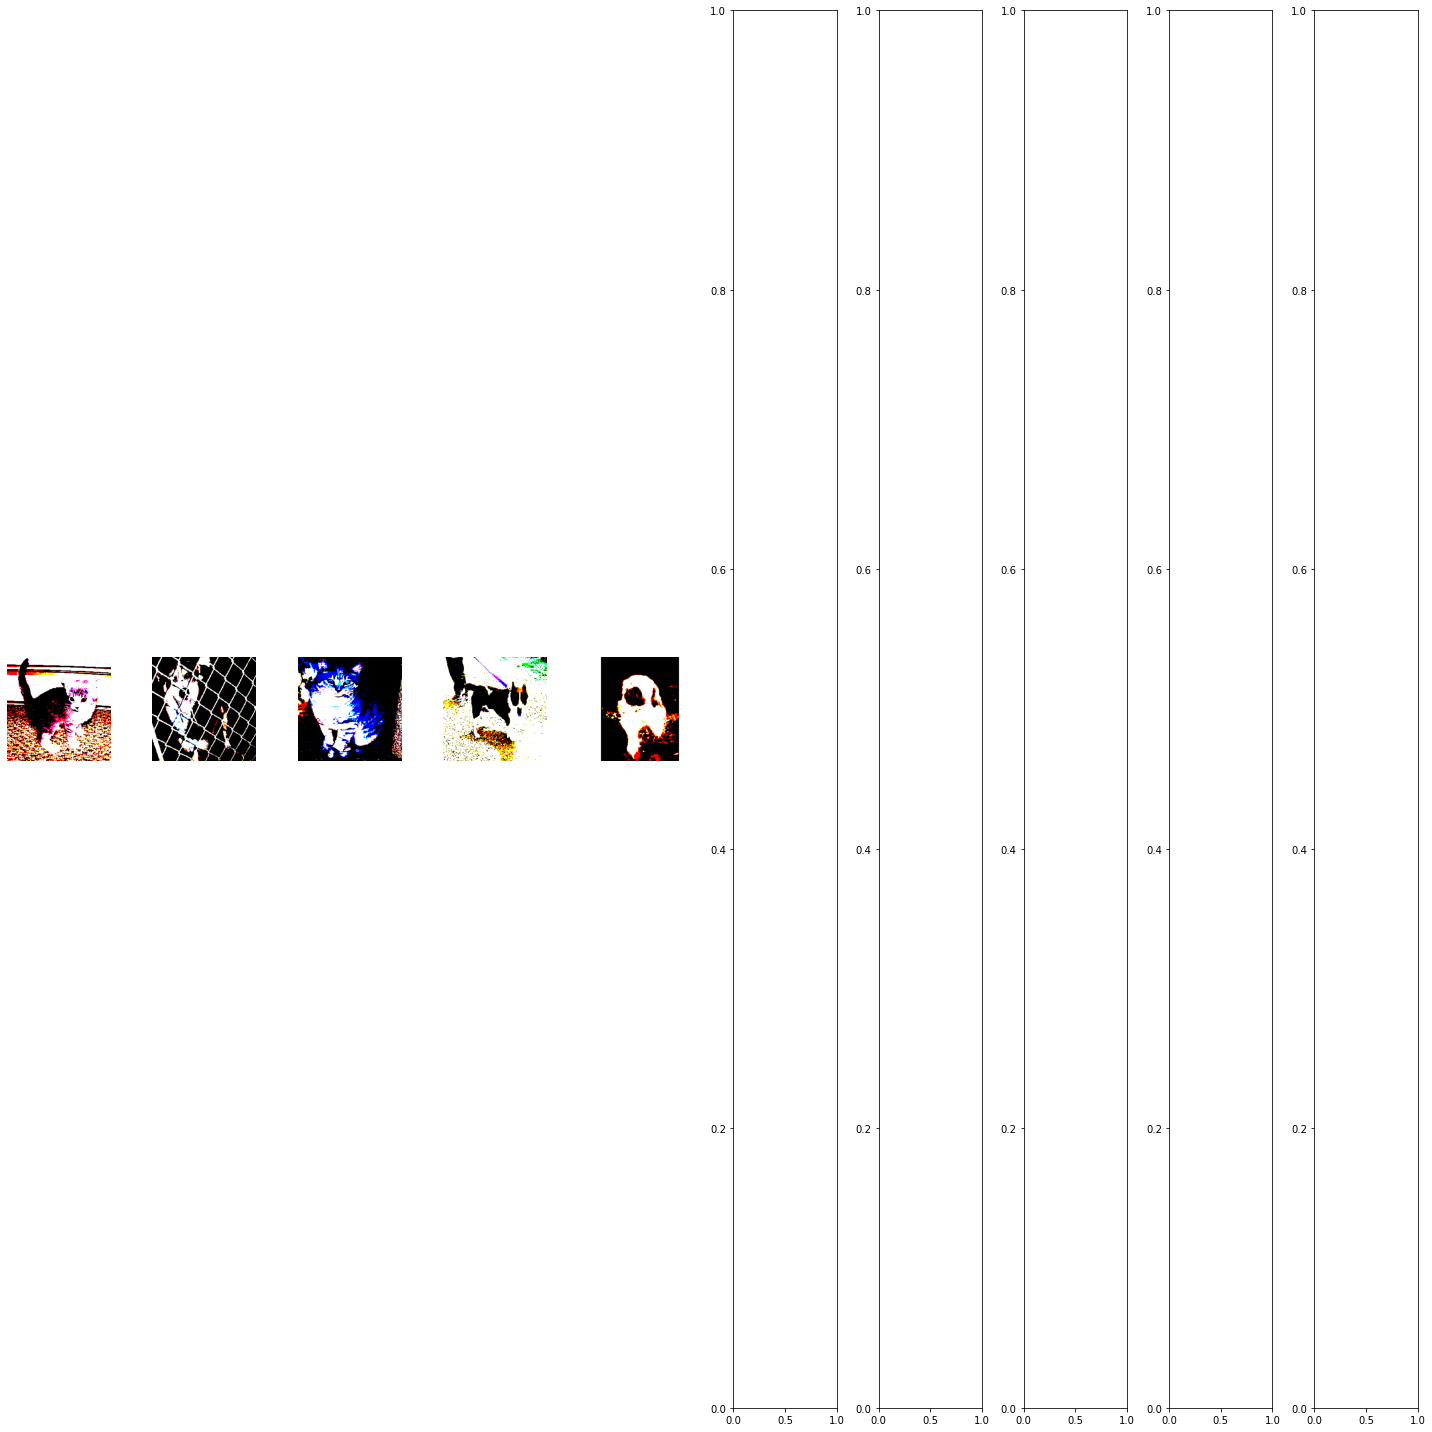

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2,2), strides=2), 
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same' ),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')])

2022-08-31 12:12:07.345094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 12:12:07.345880: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-31 12:12:07.345963: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-31 12:12:07.346295: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-31 12:12:07.346643: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=["accuracy"])

In [12]:
# don't need to specify y because the data is stored as a generator, they are stored within the generatot themselves
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
1800/1800 - 297s - loss: 3.1874 - accuracy: 0.6473 - val_loss: 0.6329 - val_accuracy: 0.6740 - 297s/epoch - 165ms/step
Epoch 2/10
1800/1800 - 283s - loss: 0.3155 - accuracy: 0.8712 - val_loss: 0.7514 - val_accuracy: 0.6620 - 283s/epoch - 157ms/step
Epoch 3/10
1800/1800 - 289s - loss: 0.1374 - accuracy: 0.9504 - val_loss: 0.8345 - val_accuracy: 0.7240 - 289s/epoch - 160ms/step
Epoch 4/10
1800/1800 - 319s - loss: 0.1058 - accuracy: 0.9649 - val_loss: 0.9667 - val_accuracy: 0.7120 - 319s/epoch - 177ms/step
Epoch 5/10
1800/1800 - 264s - loss: 0.0949 - accuracy: 0.9686 - val_loss: 1.1049 - val_accuracy: 0.7200 - 264s/epoch - 146ms/step
Epoch 6/10
1800/1800 - 262s - loss: 0.0683 - accuracy: 0.9777 - val_loss: 1.2607 - val_accuracy: 0.6760 - 262s/epoch - 146ms/step
Epoch 7/10
1800/1800 - 296s - loss: 0.0476 - accuracy: 0.9848 - val_loss: 1.5994 - val_accuracy: 0.6980 - 296s/epoch - 164ms/step
Epoch 8/10
1800/1800 - 298s - loss: 0.0442 - accuracy: 0.9866 - val_loss: 1.7782 - val_acc